In [103]:
# for xarray
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

#for iris
import iris
import iris.coord_categorisation  # allows you to add new coordinates to your data cube
import iris.quickplot as qplt

%matplotlib inline  
plt.rcParams['figure.figsize'] = (12, 5)

In [82]:
g_fpath= 'GPCP.PRECIP.NC'

Plot using xarray!

In [ ]:
file = xr.open_dataset(g_fpath)

In [55]:
pcp=file.precip

In [56]:
p_monthly = pcp.groupby('time.season').mean(dim='time')

In [119]:
p_monthly.shape

(4, 72, 144)

In [124]:
p_monthly['lon'].max()

<xarray.DataArray 'lon' ()>
array(358.75)

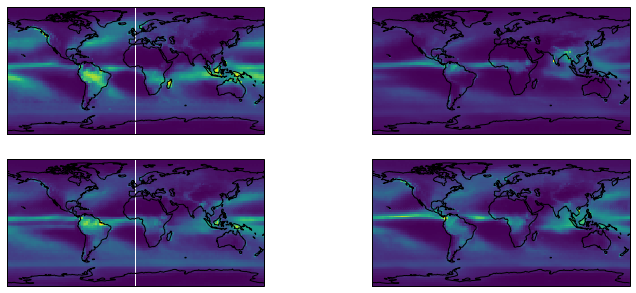

In [116]:
#### USE PURE MATPLOTLIB / CARTOPY

f = plt.figure()
for ind, p in enumerate(range(4)):
    ax = f.add_subplot(2,2,ind+1, projection=ccrs.PlateCarree()) 
    #### Here was the problem in the script you downloaded. For colormesh, you need to add the coordinates if using pure cartopy
    plt.pcolormesh(p_monthly[ind,:,:]['lon'].values, p_monthly[ind,:,:]['lat'].values, p_monthly[ind,:,:].values, transform=ccrs.PlateCarree(), cmap='viridis')
    ax.coastlines()

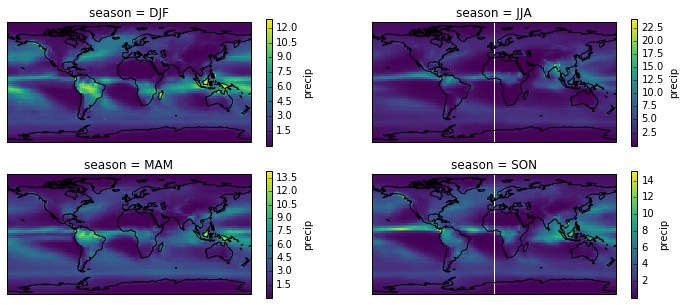

In [115]:
#### USE XARRAY INTERNAL PLOTTING FUNCTIONS 

f = plt.figure()
for ind, p in enumerate(range(4)):
    ax = f.add_subplot(2,2,ind+1, projection=ccrs.PlateCarree()) 
    p_monthly[ind,:,:].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())
    ax.coastlines()

Plot using Iris

In [87]:
iris.FUTURE.netcdf_promote = True

In [92]:
file = iris.load(g_fpath)
precip = file[0]

In [93]:
iris.coord_categorisation.add_season_number(precip, 'time', name='season')

In [95]:
p_mean= precip.aggregated_by(['season'], iris.analysis.MEAN)

In [96]:
p_mean

<iris 'Cube' of Average Monthly Rate of Precipitation / (mm/day) (-- : 4; latitude: 72; longitude: 144)>

C:\Miniconda3\lib\site-packages\iris\coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Miniconda3\lib\site-packages\iris\coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


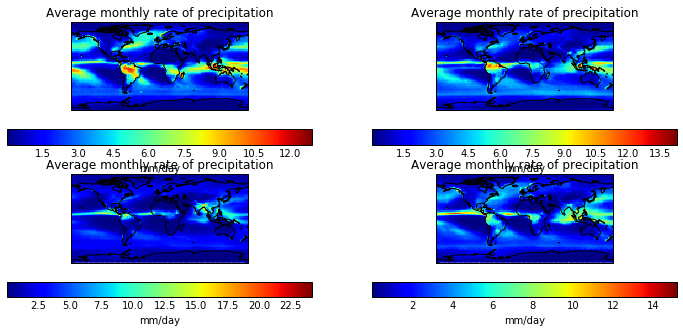

In [105]:
### USE IRIS CUBE AND IRIS INTERNAL QUICKPLOT FUNCTION

f = plt.figure()
for ind, p in enumerate(range(4)):
    ax = f.add_subplot(2,2,ind+1, projection=ccrs.PlateCarree()) 
    qplt.pcolormesh(p_mean[ind,:,:])   # with iris quick plotting function
    ax.coastlines()
    #plt.gca().coastlines() # same as ax.coastlines, but if you want to remove axis keyword and use plt.subplot
    plt.tight_layout

"High level" plotting functions from xarray or Iris handle coordinates internally, hidden in their objects! 
If you use the lower level standard matplotlib functions for plotting, you need to handle the coordinates! 

As you can see, the high level plotting functions add stuff like title and colorbars per default. While this is nice for quick plotting, you might not want that for your own plot design... 